# Multivariate Thinking
### Exploratory Data Analysis in Python
####  Career track : Data Analyts with Python 
##### DataCamp - 2020
##### Karen Jimenez

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import linregress

#Read the dataset
brfss_orig = pd.read_hdf('brfss.hdf5', 'brfss')
gss_orig = pd.read_hdf('gss.hdf5', 'gss')

## Using StatsModels

In [23]:
# Run regression with linregress
subset = brfss_orig.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss_orig).fit()
print(results.params)

LinregressResult(slope=0.06988048092105018, intercept=1.5287786243363106, rvalue=0.11967005884864096, pvalue=1.3785039162490265e-238, stderr=0.002110976356332333)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


## Plot income and education

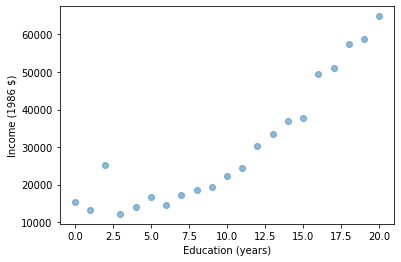

In [24]:
# Group by educ
grouped = gss_orig.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha = 0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()
# It looks like the relationship between income and education is non-linear.

## Non-linear model of education

In [30]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss_orig['educ2'] = gss_orig['educ']**2

gss_orig['age2'] = gss_orig['age']**2


# Run a regression model with educ, educ2, age, and age2
model = smf.ols('realinc ~ educ + educ2 + age + age2',data = gss_orig)
results = model.fit()

# Print the estimated parameters
print(results.params)

# The slope associated with educ2 is positive, so the model curves upward.

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


## Making predictions

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


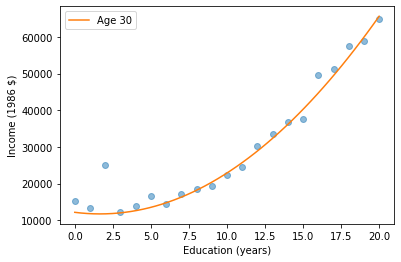

In [35]:
#At this point, we have a model that predicts income using age, education, and sex.

#Let's see what it predicts for different levels of education, holding age constant.

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss_orig).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

# Plot mean income in each age group
plt.clf()
grouped = gss_orig.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## Looks like this model captures the relationship pretty well.

## Predicting a binary variable

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


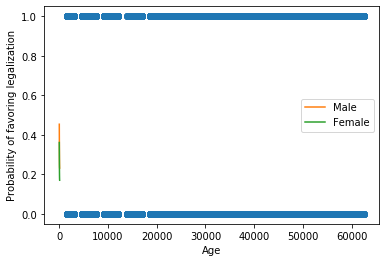

In [36]:
# Recode grass
gss_orig['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss_orig).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss_orig.groupby('age')
favor_by_age = gss_orig['grass']
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label = 'Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()